<a href="https://colab.research.google.com/github/Gulwalishah/Cubic_Histopolation/blob/main/Quadratic_CovexData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

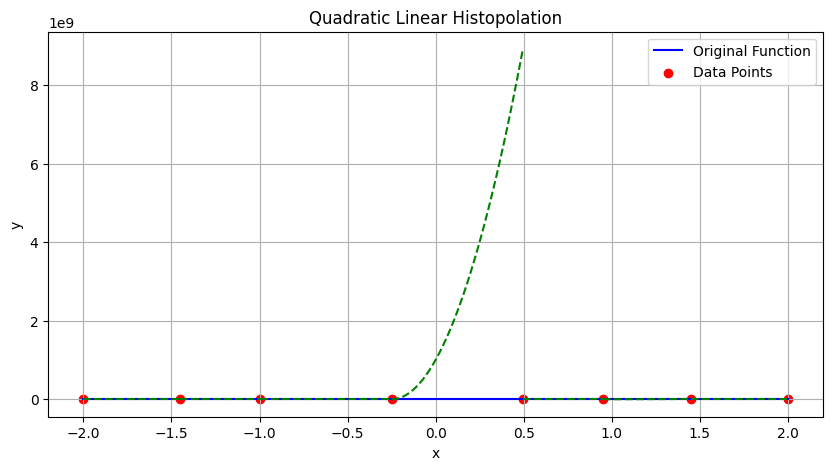

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import leastsq

def quadlin_histopolation():
    n = 8
    cc = 1.7
    k = np.zeros(n)
    h = np.zeros(n)
    M0 = np.zeros(n)
    D = np.zeros(n)
    x = np.linspace(-2, 2, n + 1)
    a = x[0]
    b = x[-1]
    hh = (b - a) / n

    for i in range(1, n):
        k[i] = 1 / 2

    k[1] = 9 / 10
    k[2] = 99 / 100
    k[3] = 5 / 10
    k[4] = 1 / 100
    k[5] = 1 / 10
    k[6] = 1 / 10

    for i in range(1, n):
        h[i] = x[i + 1] - x[i]

    D[0] = 1
    for i in range(1, n - 1):
        D[i] = cc ** ((-1) ** i) * hh ** 3
    D[n - 1] = 1

    D[1] = hh ** 3
    D[2] = hh ** 3
    D[3] = hh ** 3 * cc
    D[4] = hh ** 3
    D[5] = hh ** 3
    D[6] = hh ** 3

    AA = np.zeros((n, n))
    AA[0, 0] = 1

    for i in range(1, n - 1):
        AA[i, i - 1] = 2 * hh
        AA[i, i] = -4 * hh
        AA[i, i + 1] = 2 * hh

    AA[n - 1, n - 1] = 1
    z = np.linalg.solve(AA, -D)

    for i in range(n):
        z[i] = (intf(x[i + 1]) - intf(x[i])) / (x[i + 1] - x[i])

    D[0] = ddf(a)
    for i in range(1, n - 1):
        D[i] = (h[i] + h[i + 1]) * z[i - 1] - (h[i - 1] + 2 * h[i] + h[i + 1]) * z[i] + (h[i - 1] + h[i]) * z[i + 1]
    D[n - 1] = ddf(b)

    xi = np.zeros(n)
    xi[0] = x[0]
    for i in range(1, n - 1):
        xi[i] = k[i] * x[i] + (1 - k[i]) * x[i + 1]
    xi[n - 1] = x[n]

    eps = np.zeros(n - 1)
    nu = np.zeros(n - 1)
    delta = np.zeros(n - 1)

    for i in range(n - 1):
        eps[i] = x[i + 1] - xi[i]
        nu[i] = xi[i + 1] - x[i + 1]
        delta[i] = eps[i] + nu[i]

    M0 = np.copy(D)
    M0[1] *= 1
    M0[2] *= 0.1
    M0[3] *= 20
    M0[4] *= 0.01
    M0[5] *= 5
    M0[6] *= 1

    cc = 5.6
    M0[1] *= 8
    M0[2] *= 0.001
    M0[3] *= 500
    M0[4] *= 0.00001
    M0[5] *= 20
    M0[6] *= 3

    M0[1] *= 15
    M0[2] *= 0.25
    M0[3] *= 55
    M0[4] *= 0.25
    M0[5] *= 30

    cc = 1.85
    M0[1] *= 15
    M0[2] *= 0.25
    M0[3] *= 85
    M0[4] *= 0.25
    M0[5] *= 40

    cc = 2.43
    M0[1] *= 30
    M0[2] *= 0.02
    M0[3] *= 250
    M0[4] *= 0.02
    M0[5] *= 80
    M0[6] *= 0.2

    return x, z, xi, M0

def intf(x):
    return x ** 5 / 5 + 2 * x ** 3 / 3 - x

def ddf(x):
    return 20 * x ** 3 + 6 * x

def g(M, n):
    x, z, xi, _ = quadlin_histopolation()
    D = np.zeros(n)
    for i in range(n):
        D[i] = (intf(xi[i + 1]) - intf(xi[i])) / (xi[i + 1] - xi[i])

    diff = np.zeros(n - 1)
    for i in range(n - 1):
        diff[i] = z[i] + z[i + 1] - 2 * D[i]

    return diff

x, z, xi, M0 = quadlin_histopolation()

# Display the results
plt.figure(figsize=(10, 5))

# Plot the original function
x_orig = np.linspace(-2, 2, 100)
y_orig = intf(x_orig)
plt.plot(x_orig, y_orig, label='Original Function', color='blue')

# Plot the piecewise linear interpolation
for i in range(len(xi) - 1):
    x_interval = np.linspace(xi[i], xi[i + 1], 100)
    y_interval = M0[i] * (x_interval - xi[i]) ** 2 + z[i] * (x_interval - xi[i]) + intf(xi[i])
    plt.plot(x_interval, y_interval, linestyle='--', color='green')

# Plot the data points
plt.scatter(xi, [intf(val) for val in xi], color='red', marker='o', label='Data Points')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Quadratic Linear Histopolation')
plt.legend()
plt.grid(True)

plt.show()
